In [3]:
!gdown https://drive.google.com/u/0/uc?id=1taVhm1Nhl0jXwdSH-R6tTrwc8KBqMmXI&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1taVhm1Nhl0jXwdSH-R6tTrwc8KBqMmXI
To: /content/dataAAII.zip
6.05GB [02:20, 43.0MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Preparation**




## **Prepare Covid-Net dataset**

In [5]:
!unzip -qq dataAAII.zip

# **Importing data**

In [6]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

np.random.seed(7)

train_data = pd.read_csv('https://raw.githubusercontent.com/pimonteiro/Covid-19-Detector/master/dataset/train_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
print(train_data.head())
trainDataLength = len(train_data.index)


test_data = pd.read_csv('https://raw.githubusercontent.com/pimonteiro/Covid-19-Detector/master/dataset/test_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
test_data.head(1)
testDataLength = len(test_data.index)
print(testDataLength)



Using TensorFlow backend.


  id                                              image     result type1 type2
0  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  pneumonia    PA   NaN
1  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....  pneumonia    PA   NaN
2  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...  pneumonia    PA   NaN
3  7  SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...  pneumonia    PA   NaN
4  7  SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...  pneumonia    PA   NaN
1510


In [7]:
print(train_data['result'].unique())
train_data[train_data['result'] == 'COVID-19'].count()

['pneumonia' 'COVID-19' 'normal']


id        223
image     223
result    223
type1     196
type2      27
dtype: int64

In [8]:
print(test_data['result'].unique())
test_data[test_data['result'] == 'COVID-19'].count()

['pneumonia' 'COVID-19' 'normal']


id        31
image     31
result    31
type1     31
type2      8
dtype: int64

In [9]:
import tensorflow as tf
##from tensorflow import keras
import keras

import os
import re
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image

#variaveis globais
imgSize = 224
batchSize = 32
nets = 5
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2
)

test_generator = ImageDataGenerator(
    rescale=1/255
)

datasetTraining = train_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    directory="data/train/",
    y_col='result',
    shuffle=True,
    target_size=(imgSize, imgSize),
    batch_size = batchSize,
    class_mode='categorical'
)

datasetTest = test_generator.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="data/test/",
    y_col='result',
    shuffle=True,
    target_size=(imgSize, imgSize),
    batch_size = batchSize,
    class_mode='categorical'
)

Found 13640 validated image filenames belonging to 3 classes.
Found 1510 validated image filenames belonging to 3 classes.


## **Analysing Data**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


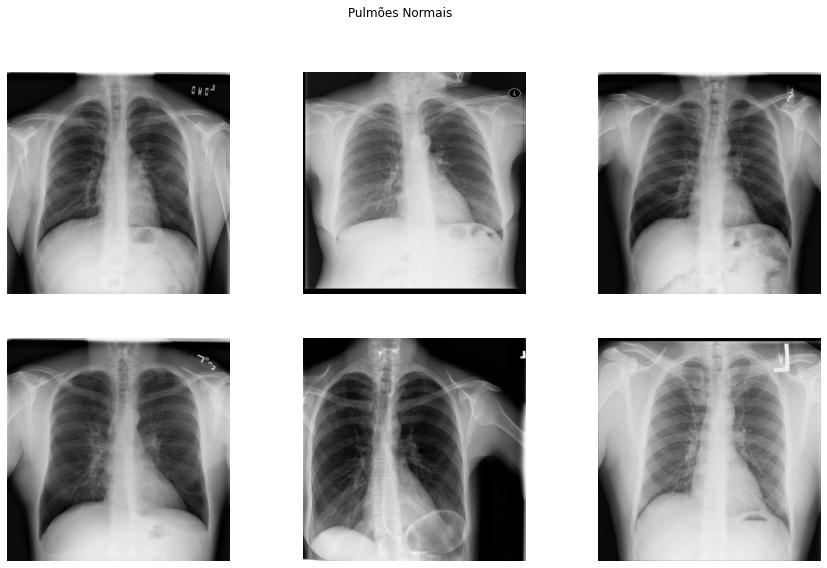

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

import cv2

f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'normal']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  print(im.shape)
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões Normais')
plt.show()

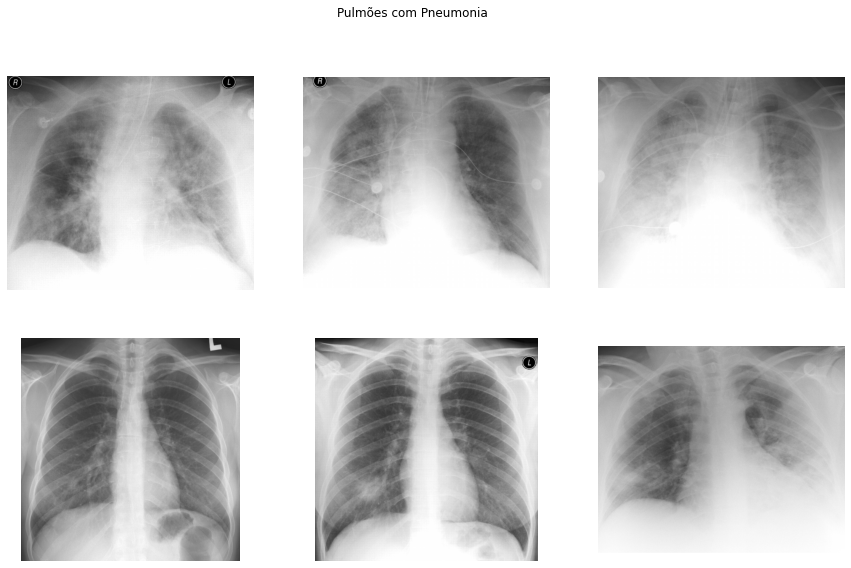

In [12]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'pneumonia']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com Pneumonia')
plt.show()


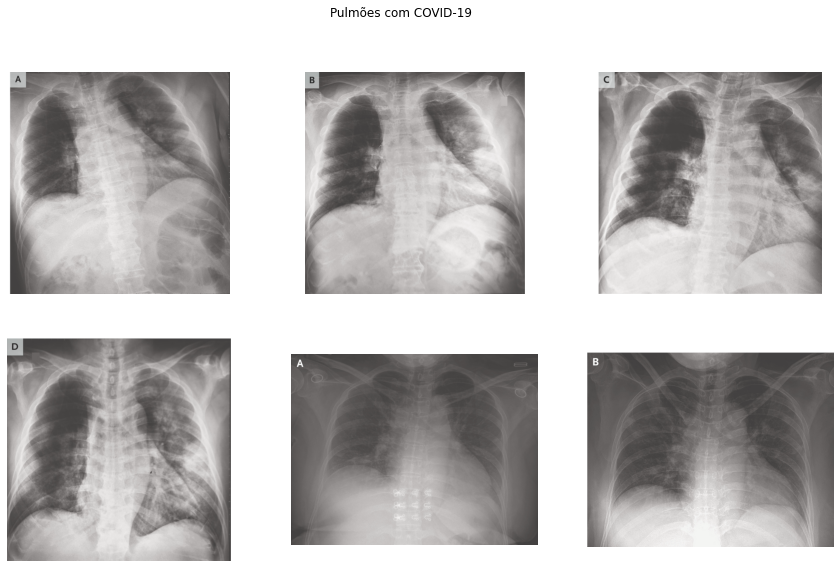

In [13]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'COVID-19']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com COVID-19')
plt.show()

<Figure size 432x288 with 0 Axes>

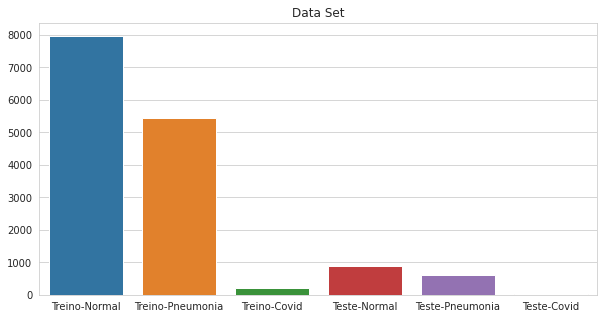

In [14]:
sns.set_style('whitegrid')
plt.figure()
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid','Teste-Normal','Teste-Pneumonia','Teste-Covid'],
                    y=[train_data[train_data['result'] == 'normal'].shape[0],
                       train_data[train_data['result'] == 'pneumonia'].shape[0],
                       train_data[train_data['result'] == 'COVID-19'].shape[0],
                       test_data[test_data['result'] == 'normal'].shape[0],
                       test_data[test_data['result'] == 'pneumonia'].shape[0],
                       test_data[test_data['result'] == 'COVID-19'].shape[0]
                    ]) 
grafico.set_title('Data Set')
plt.show()

# **Developing model**

## **Auxiliary Functions**

In [15]:
import os

def save_model_on_cloud(model,name,ind):
  path="/content/drive/My Drive/covid_runs/run"+ind
  os.makedirs(path)
  model.save_weights(path + "/last_run" + name + ".hdf5")
  json_model = model.to_json()
  with open(path + "/" + name + ".json", "w") as json_file:
    json_file.write(model_json)
  os.rename("best_weights_" + name + ".hdf5", path + "/best_weights_" + name + ".hdf5")

In [16]:
from keras.models import model_from_json
import json


def load_model_from_cloud(model_path, weights_path):
  with open(model_path, 'r') as json_file:
    architecture  = json.load(json_file)
    model = model_from_json(json.dumps(architecture))
  model.load_weights(weights_path)
  return model

In [17]:
import cv2
def query_model(model, img):
  tmp_image = cv2.imread(img)
  tmp_image = np.array(tmp_image)
  tmp_image = cv2.resize(tmp_image, (image_width, image_height))
  tmp_image = tmp_image / 255
  res = model.predict(np.expand_dims(tmp_image, axis=0))
  print(test_set.class_indices)
  ind = np.argmax(res)
  print(ind)
  print([t * 100 for t in res])

## **Convolutional Neural Network Model**

<br/>

This notebook features a training network with a **LeNet** architecture.



**This architecture consists:**

- Two sets: *Convolutional Layers* and *Pooling Layers*
- One *Flattening Convolution Layer*
- Two *Fully-Connected Layers*
- A *softmax* classificator

**However, the final *Convolutionals Neurals Networks* have some improvements over this architecture:**

- Two filters 3x3 instead a filter 5x5
- Changed the *Pooling Layers* when we defined the *Convolutional Layer* with *stride* 2
- Have a *Pooling Layers* with learning ability
- Used *relu* instead *sigmoid*
- Added *Batch Normalization*
- Added *Dropout*


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import metrics
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (imgSize, imgSize, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

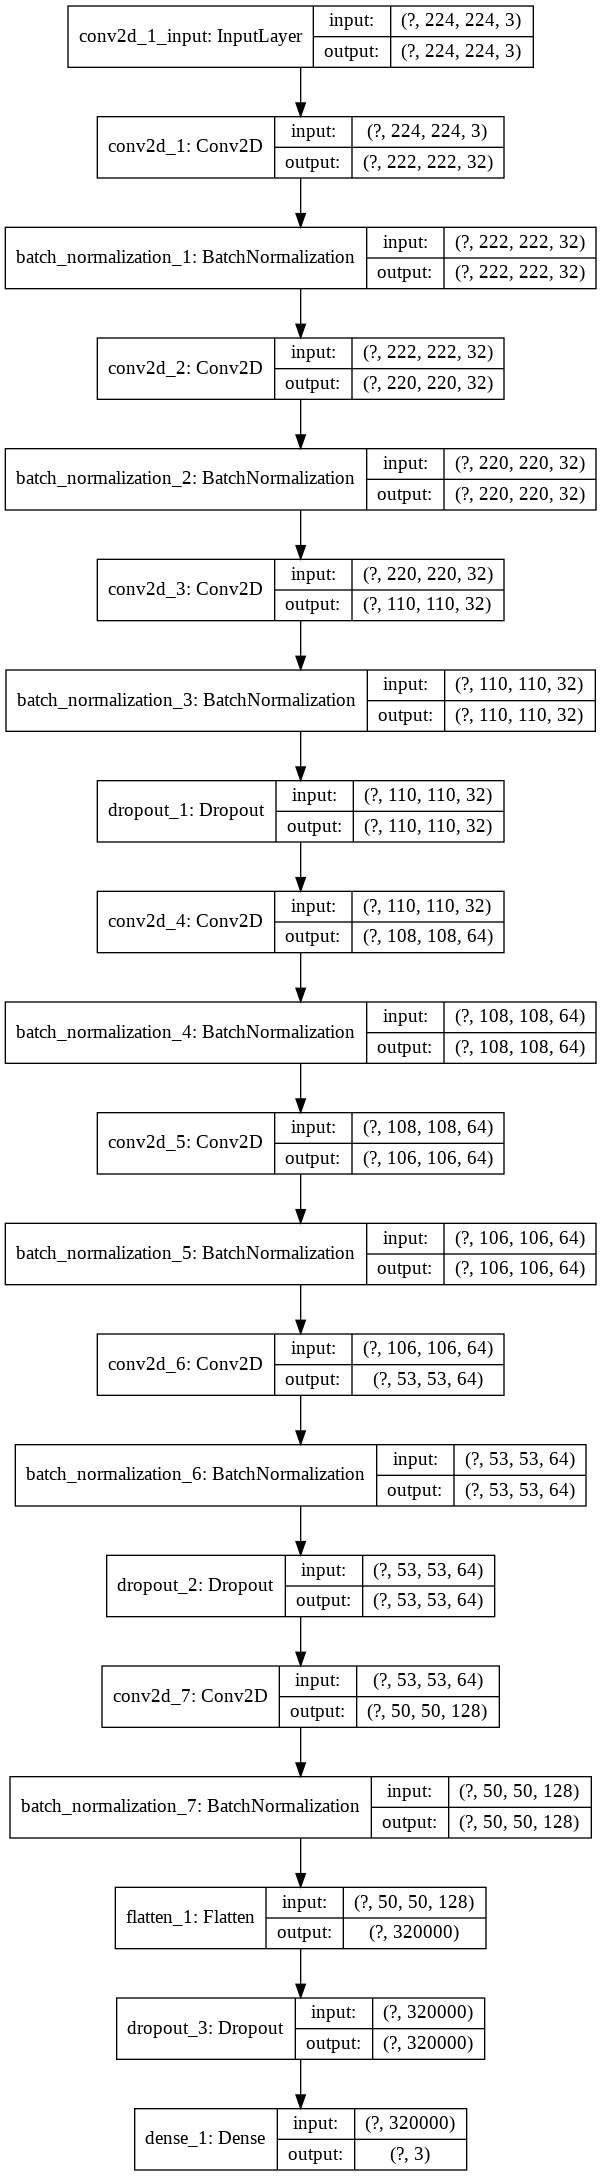

In [19]:
tf.keras.utils.plot_model(model, 'diagramaModelo.png', show_shapes=True)

In [22]:
epochs = 30

path="/content/drive/My Drive/covid_runs/lenetantigoDataset/"

os.makedirs(path,exist_ok=True)
json_model = model.to_json()
with open(path+"modelLenet.json", "w") as json_file:
  json_file.write(json_model)


history = model.fit_generator(
    datasetTraining,
    epochs = epochs,
    validation_data=datasetTest
)

model.save_weights(path + "last_run.hdf5")


Epoch 1/30
427/427 [==============================] - 435s 1s/step - loss: 9.8337 - accuracy: 0.7584 - val_loss: 8.2888 - val_accuracy: 0.7987
Epoch 2/30
427/427 [==============================] - 410s 960ms/step - loss: 6.7183 - accuracy: 0.7710 - val_loss: 0.0000e+00 - val_accuracy: 0.8126
Epoch 3/30
427/427 [==============================] - 411s 962ms/step - loss: 4.6243 - accuracy: 0.7727 - val_loss: 1.3573e-04 - val_accuracy: 0.8331
Epoch 4/30
427/427 [==============================] - 414s 970ms/step - loss: 2.8272 - accuracy: 0.7778 - val_loss: 4.2518e-06 - val_accuracy: 0.8139
Epoch 5/30
427/427 [==============================] - 411s 963ms/step - loss: 1.7252 - accuracy: 0.7920 - val_loss: 0.1638 - val_accuracy: 0.7702
Epoch 6/30
427/427 [==============================] - 413s 967ms/step - loss: 0.9142 - accuracy: 0.8009 - val_loss: 0.3611 - val_accuracy: 0.8000
Epoch 7/30
427/427 [==============================] - 419s 982ms/step - loss: 0.5403 - accuracy: 0.8188 - val_loss:

In [23]:
resultado = []
resultado.append(model.evaluate(datasetTest)) 

48/48 [==============================] - 21s 437ms/step


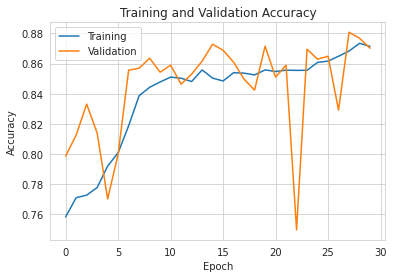

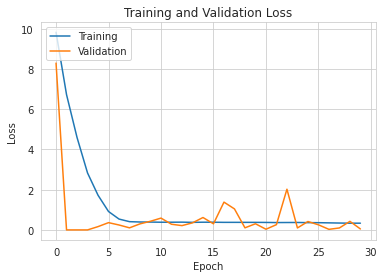

<Figure size 432x288 with 0 Axes>

In [24]:
# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
plt.savefig(path + "accuracy.png")

# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
plt.savefig(path + "loss.png")

In [25]:
model_cloud = load_model_from_cloud("/content/drive/My Drive/covid_runs/lenetantigoDataset/modelLenet.json", "/content/drive/My Drive/covid_runs/lenetantigoDataset/last_run.hdf5")
model_cloud.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 220, 220, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 32)      25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)     

In [40]:

predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="data/test/",
    y_col='result',
    shuffle=False,
    target_size=(imgSize, imgSize),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [41]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [42]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.63      0.39      0.48        31
      Normal       0.94      0.85      0.89       885
   Pneumonia       0.79      0.92      0.85       594

    accuracy                           0.87      1510
   macro avg       0.79      0.72      0.74      1510
weighted avg       0.87      0.87      0.87      1510



Text(0, 0.5, 'Ground truth')

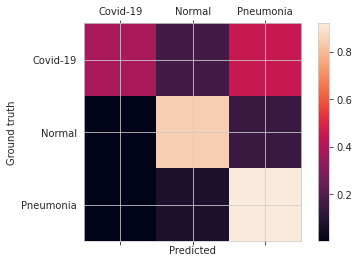

In [43]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')